## Transfer Learning Inception V3 using Keras

Please download the dataset from the below url

In [ ]:
!unzip -n -qq "/content/drive/MyDrive/88.zip"

In [ ]:


from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import tensorflow as tf



In [ ]:

IMAGE_SIZE = [224, 224]

train_path = '/content/new_train'
valid_path = '/content/valid'


In [ ]:


inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




87916544/87910968 [==============================] - 1s 0us/step


In [ ]:

for layer in inception.layers:
    layer.trainable = False

In [ ]:
  
folders = glob('/content/new_train/*')

In [ ]:

x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)


model = Model(inputs=inception.input, outputs=prediction)

In [ ]:


model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:

training_set = train_datagen.flow_from_directory('/content/new_train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 7702 images belonging to 120 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2520 images belonging to 120 classes.


In [ ]:

r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
241/241 [==============================] - 130s 498ms/step - loss: 16.2276 - accuracy: 0.4669 - val_loss: 11.0054 - val_accuracy: 0.6567
Epoch 2/20
241/241 [==============================] - 117s 487ms/step - loss: 7.6243 - accuracy: 0.7429 - val_loss: 13.8216 - val_accuracy: 0.6905
Epoch 3/20
241/241 [==============================] - 117s 487ms/step - loss: 6.0737 - accuracy: 0.8003 - val_loss: 14.1938 - val_accuracy: 0.6833
Epoch 4/20
241/241 [==============================] - 116s 483ms/step - loss: 4.8367 - accuracy: 0.8337 - val_loss: 15.6214 - val_accuracy: 0.7012
Epoch 5/20
241/241 [==============================] - 117s 485ms/step - loss: 4.1644 - accuracy: 0.8618 - val_loss: 17.0715 - val_accuracy: 0.7052
Epoch 6/20
241/241 [==============================] - 117s 485ms/step - loss: 3.8815 - accuracy: 0.8772 - val_loss: 18.2192 - val_accuracy: 0.6992
Epoch 7/20
241/241 [==============================] - 116s 483ms/step - loss: 3.5002 - accuracy: 0.8917 - val_loss: 1

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
print(tf.__version__)

2.4.0


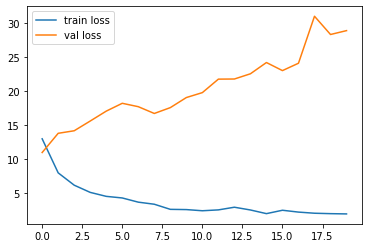

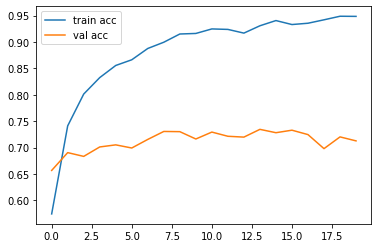

<Figure size 432x288 with 0 Axes>

In [ ]:

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:



from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [ ]:
import tensorflow as tf


In [ ]:
saved_model_path = "saved_model/dog_model"
!mkdir -p saved_model
tf.saved_model.save(model, saved_model_path)


INFO:tensorflow:Assets written to: saved_model/dog_model/assets


In [ ]:
!mkdir "tflite_models"
TFLITE_MODEL = "tflite_models/dog.tflite"

In [ ]:
model = tf.saved_model.load(saved_model_path)
concrete_func = model.signatures[
  tf.saved_model.DEFAULT_SERVING_SIGNATURE_DEF_KEY]
concrete_func.inputs[0].set_shape([1, 224, 224, 3])

converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func])

converted_tflite_model = converter.convert()
open(TFLITE_MODEL, "wb").write(converted_tflite_model)

111727740

In [ ]:

y_pred = model.predict(test_set)


AttributeError: ignored

In [ ]:
from support import prediction_from_url

def get_prediction(URL):
  prediction_from_url(URL,model,selected_breed_list)

image_url="/content/new_train/pug/120c338a78b113785c31e4ebf11d229e.jpg"
get_prediction(image_url)

ModuleNotFoundError: ignored

In [ ]:
img_pred=image.load_img('/content/new_train/pug/120c338a78b113785c31e4ebf11d229e.jpg',target_size=(224,224))
img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred,axis=0)

In [ ]:
r=model.predict(img_pred)

AttributeError: ignored

In [ ]:
import tensorflow as tf

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

AttributeError: ignored

In [ ]:
y_pred

array([[9.8109645e-01, 1.8903527e-02, 3.2149321e-13, 3.6633790e-15],
       [0.0000000e+00, 1.0000000e+00, 6.7508175e-31, 9.6766906e-34],
       [1.0000000e+00, 0.0000000e+00, 5.1786687e-12, 4.6748233e-21],
       [5.8609026e-21, 3.5736174e-38, 1.0000000e+00, 6.6462439e-35],
       [7.0799731e-33, 1.0000000e+00, 2.7118872e-18, 1.2365503e-16],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.6401240e-34],
       [7.8406102e-38, 1.5452786e-03, 0.0000000e+00, 9.9845469e-01],
       [1.1753855e-34, 6.4181074e-30, 2.3469242e-26, 1.0000000e+00],
       [1.6965836e-25, 7.5243352e-23, 1.0000000e+00, 1.5732070e-17],
       [2.4483354e-23, 9.3621990e-09, 2.4969464e-17, 1.0000000e+00],
       [2.9495364e-14, 9.7012167e-14, 1.4914777e-04, 9.9985087e-01],
       [1.0000000e+00, 2.5258806e-23, 2.3514068e-17, 3.6277342e-38],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.6495063e-24, 9.0913505e-33, 1.0000000e+00, 1.4732772e-30],
       [7.5178525e-30, 3.0929136e-

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([0, 1, 0, 2, 1, 1, 3, 3, 2, 3, 3, 0, 1, 2, 2, 3, 2, 1], dtype=int64)

In [ ]:
import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model('/content/saved_model_keras_dir') # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_resnet50.h5')

In [ ]:
tf.saved_model.save(model, "saved_model_keras_dir")

INFO:tensorflow:Assets written to: saved_model_keras_dir/assets


INFO:tensorflow:Assets written to: saved_model_keras_dir/assets


In [ ]:
img_data

array([[[[ 6.7060997e+01,  5.4221001e+01,  4.7320000e+01],
         [ 6.9060997e+01,  5.6221001e+01,  4.9320000e+01],
         [ 7.3060997e+01,  6.0221001e+01,  5.3320000e+01],
         ...,
         [ 7.4060997e+01,  5.6221001e+01,  4.6320000e+01],
         [ 5.5060997e+01,  3.7221001e+01,  2.7320000e+01],
         [ 4.1060997e+01,  2.3221001e+01,  1.3320000e+01]],

        [[ 7.5060997e+01,  6.2221001e+01,  5.5320000e+01],
         [ 7.8060997e+01,  6.5221001e+01,  5.8320000e+01],
         [ 8.1060997e+01,  6.8221001e+01,  6.1320000e+01],
         ...,
         [ 9.7060997e+01,  7.9221001e+01,  6.9320000e+01],
         [ 7.3060997e+01,  5.5221001e+01,  4.5320000e+01],
         [ 4.9060997e+01,  3.1221001e+01,  2.1320000e+01]],

        [[ 8.7060997e+01,  7.4221001e+01,  6.7320000e+01],
         [ 9.0060997e+01,  7.7221001e+01,  7.0320000e+01],
         [ 9.3060997e+01,  8.0221001e+01,  7.3320000e+01],
         ...,
         [ 1.0106100e+02,  8.3221001e+01,  7.3320000e+01],
         [

In [ ]:
img=image.load_img('Datasets/Test/Coffee/download (2).jpg',target_size=(224,224))



In [ ]:
x=image.img_to_array(img)
x

array([[[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[0.9745471, 0.0254529]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==1

array([ True])

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.2.0'